# Installing Net2Brain and Relevant Dependencies



In [ ]:
# !pip install -U git+https://github.com/cvai-roig-lab/Net2Brain



---



---


## Restart Runtime



---



---



<img src="data/Net2Brain_Logo.png" width="25%" />

# Net2Brain

__Net2Brain__ allows you to use one of over 600 Deep Neural Networks (DNNs) for your experiments comparing human brain activity with the activations of artificial neural networks. The DNNs in __Net2Brain__ are obtained from what we call different _netsets_, which are libraries that provide different pretrained models. 

__Net2Brain__ provides access to the following _netsets_:
- [Standard torchvision](https://pytorch.org/vision/stable/models.html) (`Pytorch`).
This netset is a collection of the torchvision models including models for image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection, video classification, and optical flow.
- [Timm](https://github.com/rwightman/pytorch-image-models#models) (`Timm`). 
A deep-learning library created by Ross Wightman that contains a collection of state-of-the-art computer vision models.
- [PyTorch Hub](https://pytorch.org/docs/stable/hub.html) (`Torchhub`). 
These models are accessible through the torch.hub API and are trained for different visual tasks. They are not included in the torchvision module.
- [PyTorch Video](https://pytorch.org/docs/stable/hub.html) (`Pyvideo`). 
Offers models for video analysis, including action recognition and motion classification.
- [Unet](https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/) (`Unet`). 
Unet also is available through the torch.hub.API and is trained for abnormality segmentation in brain MRI.
- [Taskonomy](https://github.com/StanfordVL/taskonomy) (`Taskonomy`). A set of networks trained for different visual tasks, like Keypoint-Detection, Depth-Estimation, Reshading, etc. The initial idea for these networks was to find relationships between different visual tasks.
- [Slowfast](https://github.com/facebookresearch/pytorchvideo) (`Pyvideo`). 
These models are state-of-the-art video classification models trained on the Kinetics 400 dataset, acessible through the torch.hub API.
- [CLIP](https://github.com/openai/CLIP) (`Clip`). 
CLIP (Contrastive Language-Image Pre-Training) is a vision+language multimodal neural network trained on a variety of (image, text) pairs.
- [CorNet](https://github.com/dicarlolab/CORnet) (`Cornet`). 
A set of neural networks whose structure is supposed to resemble the one of the ventral visual pathway and therefore implements more recurrent connections that are commonplace in the VVS.
- [Huggingface](https://huggingface.co/) (`Huggingface`). 
Features a broad range of advanced language models that deal with text-input.
- [Yolo](https://github.com/ultralytics/yolov5) (`Yolo`). 
Includes fast, accurate YOLOv5 models for real-time object detection in images and video streams.
- **Toolbox** (`Toolbox`). 
A set of networks that are implemented within Net2Brain.



---
---

**Net2Brain** consists of 4 main parts:
1. **Feature Extraction**
  > Handles input in the form of images, videos or text and extracts relevant features for analysis and saves them into .npz files.
2. **Representational Dissimilarity Matrix (RDM) Creation**
> Utilizes numpy arrays (.npz files) from the feature extraction process to create RDMs that quantify dissimilarities between data representations with different distance metrics.
3. **Evaluation**
> Provides a comprehensive suite of evaluation methods including Linear Encoding, Representational Similarity Analysis (RSA), and more, to assess and compare model performance
4. **Plotting**
> Offers advanced visualization tools to graphically display the results of various analyses, enhancing interpretability and presentation of findings.




---



---




# Step 0: Exploring the Toolbox - Model Taxonomy

In [ ]:
from net2brain.taxonomy import show_all_architectures
from net2brain.taxonomy import show_all_netsets
from net2brain.taxonomy import show_taxonomy
from net2brain.taxonomy import print_netset_models

from net2brain.taxonomy import find_model_like_name
from net2brain.taxonomy import find_model_by_dataset
from net2brain.taxonomy import find_model_by_training_method
from net2brain.taxonomy import find_model_by_visual_task
from net2brain.taxonomy import find_model_by_custom

To view a list of all available models along with the information on which netset they belong to, you can use the `print_all_models()` function to print them.

In [ ]:
show_all_architectures()
show_all_netsets()

You can also inspect the models available from a particular _netset_ using the function `print_netset_models()`:

We also offer a comprehensive model taxonomy to help you find the most suitable model for your study. Each model in our toolbox has distinct attributes that cater to various research requirements. To facilitate your selection process, we provide a taxonomic overview of the models available.

To see the available attributes, use the show_taxonomy function. You can then search for a model based on one or more attributes using the following functions:

- `find_model_like(model_name)`
- `find_model_by_dataset(attributes)`
- `find_model_by_training_method(attributes)`
- `find_model_by_visual_task(attributes)`
- `find_model_by_custom([attributes], model_name)`

This taxonomy system is designed to help you easily identify and choose the most appropriate model for your research needs.

In [ ]:
show_taxonomy()

Or you can find a model by its name using the function `find_model_like()`:

In [ ]:
find_model_like_name('ResNet')

The `find_model_by_dataset(attributes)` function enables you to search for models associated with a specific dataset, such as 'ImageNet', 'ImageNet 22K', or 'COCO'.

In [ ]:
find_model_by_dataset("Taskonomy")

The `find_model_by_training_method(attributes)` function helps you discover models based on their training methodology, such as 'Supervised', 'Jigsaw', or 'NPID'.

In [ ]:
find_model_by_training_method("SimCLR")

The `find_model_by_visual_task(attributes)` function allows you to search for models specifically trained for a particular visual task, such as 'Object Detection', 'Panoptic Segmentation', or 'Semantic Segmentation'. 

In [ ]:
find_model_by_visual_task("Panoptic Segmentation")

The `find_model_by_custom([attributes], model_name)` function enables you to search for models based on a combination of the attributes mentioned above. You can provide a list of attributes to filter the models, and optionally specify a particular model name to further refine your search.

In [ ]:
find_model_by_custom(["COCO", "Object Detection"], model_name="fpn")



---



---



# Example Study: Exploring the Function of the Parahippocampal Place Area (PPA)

The Parahippocampal Place Area (PPA) is a scene-selective brain region in the late ventral pathway. It is believed to represent abstract relationships between scene elements, such as individual relations between objects. However, recent research suggests that the PPA is more focused on understanding how the parts of a picture are arranged or put together, rather than just their meanings or purposes.


We aim to test this hypothesis using `Net2Brain` and two popular computer vision tasks, comparing neural representations with model representations for scene classification and scene parsing tasks.

**Scene Classification** identifies the scene category by considering the entire scene as a single unit. The network learns to recognize global features characterizing different scene types.

**Scene Parsing** provides pixel-wise labeling of the entire image, encoding the spatial organization of objects within the scene. This process allows the network to gain a comprehensive understanding of the scene.

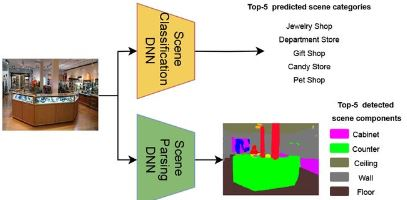

**Hypothesis:** We hypothesize that cognitive representations encoding structural relations (as suggested by recent studies on PPA) will better align with scene parsing than scene classification DNN representations. This approach enables us to investigate brain region functions using cognitive modeling.


## Roadmap


1.   **Loading Models**: Loading Scene Classification and Scene Parsing models into `Net2Brain`
2.   **Feature Generation**: Extracting model feautures using the `BonnerPnas2017`-Dataset
3. **RDM Creating**: Turning the features from both models into one RDM per network layer
4. **Evaluation through RSA**: Comparing model to PPA-representations using RSA


# Load the Dataset
> Bonner Michael F, Epstein Russell A. Coding of navigational affordances in the human visual system. Proceedings of the National Academy of Sciences. 2017;114(18):4793–4798. 

In [ ]:
from net2brain.utils.download_datasets import DatasetBonnerPNAS2017
from pprint import pprint

paths = DatasetBonnerPNAS2017.load_dataset()
pprint(paths)

In [ ]:
# Extract the paths we need

stimuli_path = paths["stimuli_path"]
roi_path = paths["PPA_Study"]

# Step 1: Using FeatureExtractor with a pretrained DNN
1. Scene Classification ([Places365 CSAILVision](https://github.com/CSAILVision/places365))
2. Scene Parsing Model ([Semantic Segmentation CSAILVision](https://github.com/CSAILVision/semantic-segmentation-pytorch)) 


To extract activations from a pretrained model in one of the netsets, you must first initialize the `FeatureExtractor` class and specify the name of the model as well as the netset it belongs to. \\
Additionally, you can choose the device on which the extraction is computed, with either `cpu` or `cuda`.

If you want to implement **your own model**, save the model in a variable and put it into the Feature Extractor like:
`FeatureExtractor(model=my_model, device='cuda')`



In [ ]:
from net2brain.feature_extraction import FeatureExtractor

fx_class = FeatureExtractor(model='Places365', 
                            netset='Toolbox', 
                            device='cuda')

fx_parsing = FeatureExtractor(model='SceneParsing',
                              netset='Toolbox', 
                              device='cuda')

### How are the models different?

In [ ]:
#@title Code for visualizaion
# System libs
import numpy as np
import scipy.io
import PIL.Image
import torchvision.transforms
import torch
from mit_semseg.utils import colorEncode
import os
CUDA_LAUNCH_BLOCKING=1

# Navigate up one directory from stimuli_data and into the etc directory
etc_path = os.path.join(stimuli_path, os.pardir, "etc")  

# Construct paths for the files
color_file_path = os.path.join(etc_path, "color150.mat")
image_file_path = os.path.join(etc_path, "ADE_val_00001193.jpg")

# Get colors
colors = scipy.io.loadmat(color_file_path)['colors']

def visualize_result(img, scores, index=None):

    _, pred = torch.max(scores, dim=1)
    pred = pred.cpu().numpy()[0]
    if index is not None:
        pred = pred.copy()
        pred[pred != index] = -1

    pred_color = colorEncode(pred, colors).astype(np.uint8)
    img = img.astype(np.uint8)
    im_vis = np.concatenate((img, pred_color), axis=1)
    display(PIL.Image.fromarray(im_vis))

# Load and normalize one image as a singleton tensor batch
pil_to_tensor = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

pil_image = PIL.Image.open(image_file_path).convert('RGB')
img_data = pil_to_tensor(pil_image)
input_image = img_data.unsqueeze(0).cuda()



In [ ]:
#@title Testing the models

# Run Scene Classification Model from toolbox
scores_scene_classification = fx_class.model(input_image)
_, pred = torch.max(scores_scene_classification, dim=1)
print("Scene Classificaion:", pred) # orchard 249


# Run Scene Parsing Model from toolbox
scores_scene_parsing = fx_parsing.model(input_image) 
visualize_result(np.array(pil_image.resize((224, 224))), scores_scene_parsing)


This initializes the feature extractor and loads the model and any specified layers for extraction into the instance. To view the layers that are set to be extracted, you can execute `fx.layers_to_extract`.

In [ ]:
fx_class.layers_to_extract

Note that the suggested layers may not be exhaustive. To view a complete list of all available layers, you can use `fx.get_all_layers()` and overwrite the `layers_to_extract` attribute with your desired subset.

In [ ]:
fx_class.get_all_layers()

### Extracting Layer features
To extract weights from the layers, you can use the `fx.extract()` function and provide the path to the images that you want to run through the network. You can choose between the 'npz', 'pt', or 'dataset' formats, but it is recommended to use 'npz' if you plan to use the other steps in the toolbox.


In [ ]:
# Create features for the Scene Classification model
fx_class.extract(data_path=stimuli_path, 
                 save_path='Classification_Feats',
                 layers_to_extract=['model.4', 'model.5', 'model.6', 'model.7', 'model.9'])

# Create features for the Scene Parsing model
fx_parsing.extract(data_path=stimuli_path, 
                   save_path='Parsing_Feats')



---



---



# Step 2: Creating RDMs from Layer Features
In Step 1 of the process, the Feature Extractor extracts features that are used here in Step2 to calculate Representational Dissimilarity Matrices (RDMs) through the built-in functionality of the RDM creator. To do this, the RDM creator function requires the path to the location of the .npz files containing all the layer features for each image in a [Batch x Channel x Height x Width] format. The function then produces an RDM in the shape of (#Images,#Images) for each layer.

In [ ]:
from net2brain.rdm_creation import RDMCreator

# Create RDMs for the Scene Classification model
creator_class = RDMCreator()
creator_class.create_rdms(feature_path="Classification_Feats", save_path="Classification_RDMs", save_format='npz') 

# Create RDMs for the Scene Parsing model
creator_parsing = RDMCreator()
creator_parsing.create_rdms(feature_path="Parsing_Feats", save_path="Parsing_RDMs", save_format='npz') 




---



---



# Step 3: Performing RSA on the Model RDMs and the ROI RDMs
This tutorial demonstrates how to utilize the evaluation features of Net2Brain and plot the resulting data. You have the option to select from three different metrics for evaluation: "RSA", "Weighted RSA", and "Searchlight". Each module returns a pandas dataframe that can be easily integrated into the toolbox's integrated plotting functionality.

In [ ]:
from net2brain.evaluations.rsa import RSA

# Get path to RDMs
model_rdms = r"/content/Classification_RDMs"

# Start RSA
sc_evaluation = RSA(model_rdms, 
                 roi_path, 
                 model_name="Scene Classification")

df_classification = sc_evaluation.evaluate() # Evaluation - Returns a pandas dataframe



# Get path to RDMs
model_rdms = r"/content/Parsing_RDMs"

# Start RSA
sp_evaluation = RSA(model_rdms, 
                 roi_path, 
                 model_name="Scene Parsing")

df_parsing = sp_evaluation.evaluate() # Evaluation - Returns a pandas dataframe

display(df_classification)
display(df_parsing)



In [ ]:
# Comparing statistical significance
ttest, sig_pairs = sc_evaluation.compare_model(sp_evaluation)
print(sig_pairs)

### Visualizing RSA Evaluation Results

If you would like to visualize the evaluation results, you can do so using the integrated plotting functionality of the toolbox. To do this, initialize the class with a list of dataframes that were returned through the evaluation. It is important to ensure that each dataframe contains the same ROIs, indicating that each test was conducted on the same brain RDMs. Additionally, each dataframe should contain a different model name, which can be set manually or through the "model_name" parameter during evaluation (as described above).

The following example illustrates how to plot the data using a single dataframe.

>Note: Multiple ways of plotting are planned for implementation in the future. For now, only the "best_layer" variant is available, which plots the best performing layer.

In [ ]:
from net2brain.evaluations.plotting import Plotting

# Plotting with significance
plotter = Plotting([df_classification, df_parsing])
results_dataframe = plotter.plot(pairs=sig_pairs, metric = "R")

## Let us add random weights!

In [ ]:
## Feature Extraction ##

fx_class_random = FeatureExtractor(model='Places365', 
                                   netset='Toolbox', 
                                   device='cuda',
                                   pretrained=False)

fx_class_random.extract(data_path=stimuli_path, 
                        save_path='Classification_Feats_random')

fx_parsing_random = FeatureExtractor(model='SceneParsing',
                                     netset='Toolbox', 
                                     device='cuda',
                                     pretrained=False)

fx_parsing_random.extract(data_path=stimuli_path, 
                          save_path='Parsing_Feats_random')


## RDM Creation ##



creator = RDMCreator()
creator.create_rdms(feature_path="Classification_Feats_random", save_path="Classification_RDMs_random", save_format='npz') 

creator = RDMCreator()
creator.create_rdms(feature_path="Parsing_Feats_random", save_path="Parsing_RDMs_random", save_format='npz') 




## Evaluation ##
evaluation = RSA("/content/Classification_RDMs_random", 
                 roi_path, 
                 model_name="Scene Classification (random)")

df_classification_rdm = evaluation.evaluate() # Evaluation - Returns a pandas dataframe



evaluation = RSA("/content/Parsing_RDMs_random", 
                 roi_path, 
                 model_name="Scene Parsing (random)")

df_parsing_rdm = evaluation.evaluate() # Evaluation - Returns a pandas dataframe


In [ ]:
# Plotting with significance
plotter = Plotting([df_classification, df_parsing, df_classification_rdm, df_parsing_rdm])
results_dataframe = plotter.plot(pairs=sig_pairs, metric="R")